In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data = pd.read_csv('C:/Users/maslo/Desktop/karpov_start_ml/2_module/12_lesson/materials/processed_train.csv')
data.head()

,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,...,Platform_windows8,Processor_x64,Processor_x86,Census_DeviceFamily_Windows.Server,Census_OSArchitecture_arm64,Census_OSArchitecture_x86,Census_GenuineStateName_IS_GENUINE,Census_GenuineStateName_OFFLINE,Census_GenuineStateName_UNKNOWN,HasDetections
0,0.552153,0.530941,0.587952,7.0,0,53447.0,1.0,1.0,1,29,...,0,1,0,0,0,0,1,0,0,0
1,0.448751,0.528931,0.484434,7.0,0,53447.0,1.0,1.0,1,93,...,0,1,0,0,0,0,0,1,0,0
2,0.552153,0.530941,0.557522,7.0,0,53447.0,1.0,1.0,1,86,...,0,1,0,0,0,0,1,0,0,0
3,0.552153,0.530941,0.482759,7.0,0,53447.0,1.0,1.0,1,97,...,0,1,0,0,0,0,1,0,0,0
4,0.493175,0.530941,0.505721,7.0,0,53447.0,1.0,1.0,1,164,...,0,1,0,0,0,0,1,0,0,0


In [47]:
data.HasDetections.value_counts()

0    99940
1    20012
Name: HasDetections, dtype: int64

In [63]:
len(data.columns)

79

In [62]:
data.dtypes

EngineVersion                         float64
AppVersion                            float64
AvSigVersion                          float64
RtpStateBitfield                      float64
IsSxsPassiveMode                        int64
                                       ...   
Census_OSArchitecture_x86               int64
Census_GenuineStateName_IS_GENUINE      int64
Census_GenuineStateName_OFFLINE         int64
Census_GenuineStateName_UNKNOWN         int64
HasDetections                           int64
Length: 79, dtype: object

In [64]:
data.select_dtypes(include='object')

""
0
1
2
3
4
...
119947
119948
119949
119950


Разделим выборку на тренировочную и тестовую

In [48]:
y = data['HasDetections']
X = data.drop('HasDetections', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.25, 
                                                     shuffle=True, 
                                                     random_state=1)

Обучите логистическую регрессию на тренировочной части наших данных, используя класс `LogisticRegression` из `sklearn.linear_model` с `l2` регуляризацией и коэффициентом регуляризации `C=0.01`. Ваш estimator должен нормировать данные по статистикам, рассчитывающимся на тренировочной выборке. Придется использовать конструкцию `Pipeline`. Положите все в переменную `pipe`.

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaler', StandardScaler()), ('classification', LogisticRegression(penalty='l2', C=0.01))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classification', LogisticRegression(C=0.01))])

Постройте ROC-кривую с помощью `RocCurveDisplay` и посчитайте `ROC-AUC` любым из показанных на практике способов. Один из вариантов - построить кривую с помощью `roc_curve` из `sklearn.metrics` и массивы пар `tpr-fpr` передать в `auc` из того же модуля `sklearn`. Проделайте эту операцию как для предсказаний на трейне, так и на тесте!

P.S. `roc_curve` необходимо скормить истинные метки классов (y_train/y_test), а также предсказанные вероятности (воспользуйтесь методом `predict_proba`)

In [50]:
pipe.predict_proba(X_test)[:,1]

array([0.13793555, 0.08979022, 0.18630745, ..., 0.12593751, 0.05254791,
       0.22607295])

In [51]:
y_test

5433      0
117872    1
106390    1
116401    1
65995     0
         ..
115115    1
101062    1
95329     0
6052      0
58541     0
Name: HasDetections, Length: 29988, dtype: int64

AUC ROC = 0.6991232830438959
AUC ROC = 0.6991232830438959


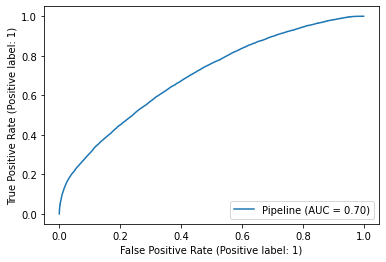

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc 
from sklearn.metrics import roc_auc_score

tpr, fpr, thresholds  = roc_curve(y_train, pipe.predict_proba(X_train)[:,1])
print('AUC ROC =', auc(tpr, fpr))
print('AUC ROC =', roc_auc_score(y_train, pipe.predict_proba(X_train)[:,1]))

RocCurveDisplay.from_estimator(pipe, X_train, y_train)

AUC ROC = 0.6968063498949493
AUC ROC = 0.6968063498949493


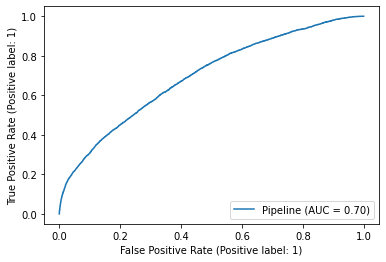

In [53]:
from sklearn.metrics import roc_auc_score

tpr, fpr, thresholds  = roc_curve(y_test, pipe.predict_proba(X_test)[:,1])
print('AUC ROC =', auc(tpr, fpr))
print('AUC ROC =', roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1]))

RocCurveDisplay.from_estimator(pipe, X_test, y_test)

In [54]:
round(0.6968063498949493, 2)

0.7

Постройте PR-кривые на трейне и на тесте. Посчитайте PR-AUC

AUC PR =  0.19790543740770355


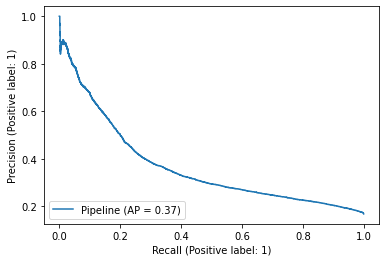

In [60]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import pr_auc_score

precision, recall, thrs = precision_recall_curve(y_train, pipe.predict_proba(X_train)[:,1])
p = precision.argsort()
precision = precision[p]
recall = recall[p]
print('AUC PR = ', auc(precision, recall))
PrecisionRecallDisplay.from_estimator(pipe, X_train, y_train)

In [59]:
precision

array([0.16787002, 0.16786073, 0.1678626 , ..., 1.        , 1.        ,
       1.        ])

AUC PR =  0.1923508338671923


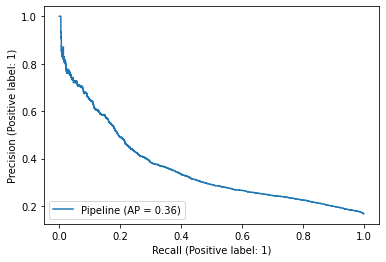

In [65]:
precision, recall, thrs = precision_recall_curve(y_test, pipe.predict_proba(X_test)[:,1])
p = precision.argsort()
precision = precision[p]
recall = recall[p]
print('AUC PR = ', auc(precision, recall))
PrecisionRecallDisplay.from_estimator(pipe, X_test, y_test)

Построим калибровочную кривую. Хорошо ли откалиброван обученный классификатор? Сравним с калибровочной кривой для случайного классификатора!

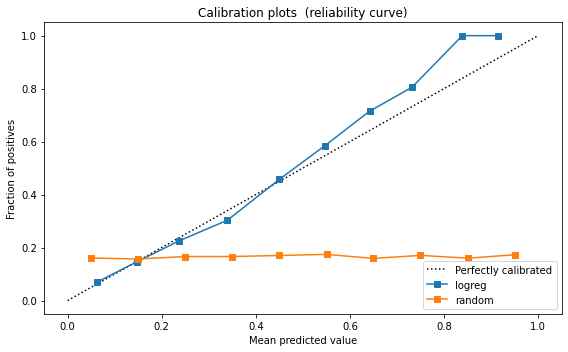

In [44]:
from sklearn.calibration import calibration_curve
plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

### Предсказания модели на тесте и соответствующая калибровочная кривая
prob_pos = pipe.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="logreg")

### Пусть наши предсказания - случайные, то есть для каждого объекта
### вероятность принадлежности + классу это просто случайное число [0; 1]
prob_pos = np.random.uniform(size=(X_test.shape[0],))
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="random")

plt.ylabel("Fraction of positives")
plt.xlabel("Mean predicted value")
plt.ylim([-0.05, 1.05])
plt.legend(loc="lower right")
plt.title('Calibration plots  (reliability curve)')
plt.tight_layout()